<a href="https://colab.research.google.com/github/Kolejking/finaldementia/blob/main/uber_cab_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [7]:
df.dropna(inplace=True)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
df.drop('Unnamed: 0	',axis=1)

KeyError: "['Unnamed: 0\\t'] not found in axis"

In [17]:
df=df[(df["fare_amount"]>0) & (df["fare_amount"]<500)]
NYC_LAT_RANGE = (40.5, 41.5)
NYC_LONG_RANGE = (-74.5, -72.5)
df = df[
    (df["pickup_latitude"].between(*NYC_LAT_RANGE)) &
    (df["pickup_longitude"].between(*NYC_LONG_RANGE)) &
    (df["dropoff_latitude"].between(*NYC_LAT_RANGE)) &
    (df["dropoff_longitude"].between(*NYC_LONG_RANGE))
]

In [21]:
df[df.duplicated()]
df.drop_duplicates()
print(f"Shape after preprocessing: {df.shape}")

Shape after preprocessing: (195760, 8)


In [26]:
from haversine import haversine, Unit

def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup, dropoff, unit=Unit.KILOMETERS)

df["distance_km"] = df.apply(calculate_distance, axis=1)

df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["day"] = df["pickup_datetime"].dt.day
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["hour"] = df["pickup_datetime"].dt.hour
df["is_rush_hour"] = df["hour"].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
df["is_night"] = df["hour"].apply(lambda x: 1 if (x < 6 or x > 22) else 0)
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
df = df[(df['distance_km'] < 100) & (df["distance_km"] > 0)]

In [25]:
!pip install haversine

In [27]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,is_rush_hour,is_night,is_weekend,distance_km
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1,0,0,1.683325
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,0,0,0,2.457593
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,0,0,0,5.036384
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1,0,0,1.661686
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,1,0,0,4.475456


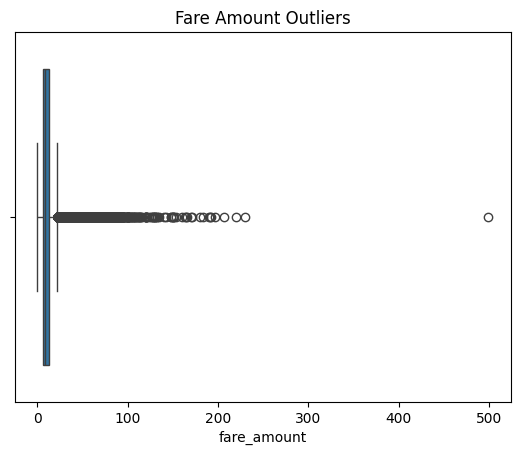

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["fare_amount"])
plt.title("Fare Amount Outliers")
plt.show()

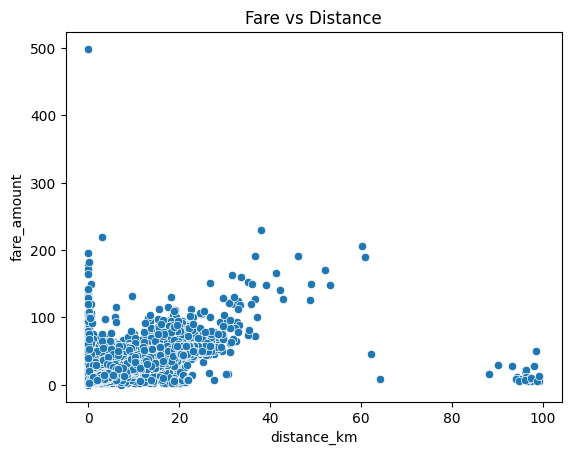

In [31]:
sns.scatterplot(x=df['distance_km'], y=df['fare_amount'])
plt.title("Fare vs Distance")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


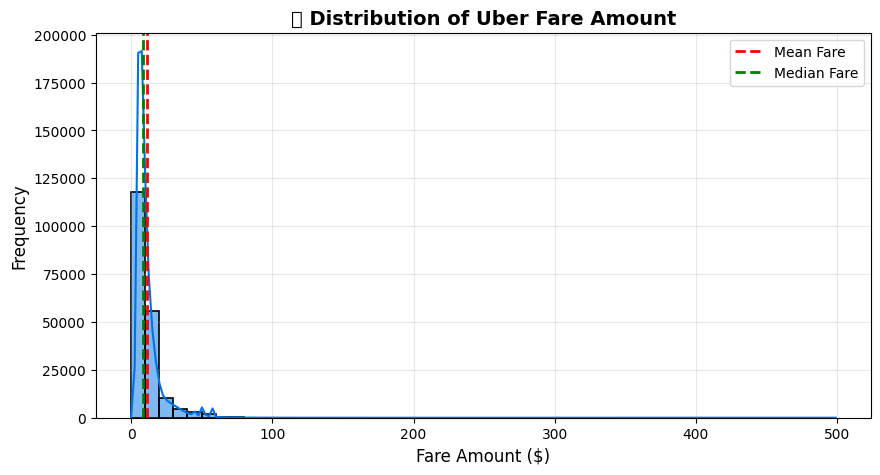

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True, color="#0073e6", edgecolor="black", linewidth=1.2)
plt.axvline(df["fare_amount"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean Fare")
plt.axvline(df["fare_amount"].median(), color="green", linestyle="dashed", linewidth=2, label="Median Fare")
plt.title("📊 Distribution of Uber Fare Amount", fontsize=14, fontweight="bold")
plt.xlabel("Fare Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

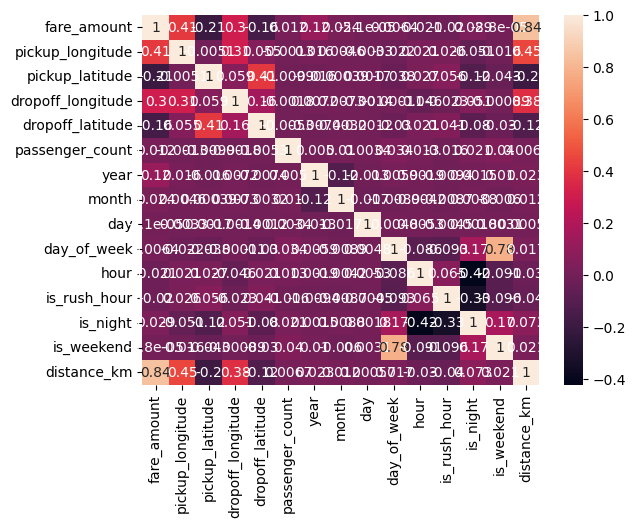

In [39]:
corr_matrixx=df.drop(['key', 'pickup_datetime'], axis=1).corr()
sns.heatmap(corr_matrixx,annot=True)
plt.show()

In [44]:
corr_matrix = df[['fare_amount', 'passenger_count', 'distance_km', 'hour', 'day', 'month', 'day_of_week']].corr()

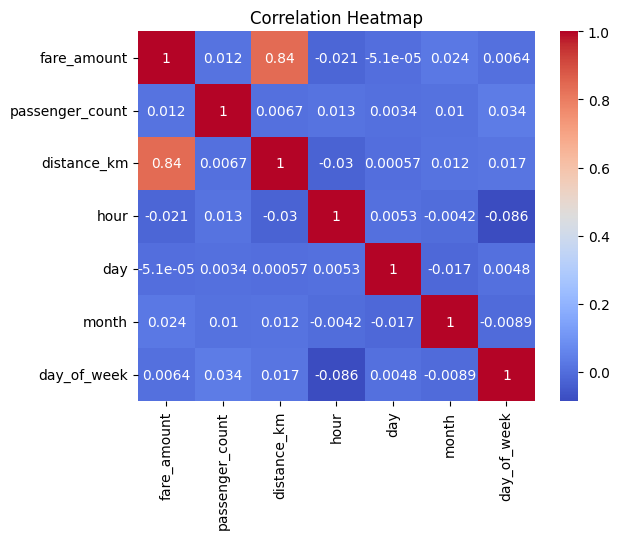

In [45]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
from folium.plugins import HeatMap

# Create a base map
nyc_map = folium.Map(location=[40.75, -74.00], zoom_start=11)

# Add pickup locations as a heatmap
heat_data = list(zip(df['pickup_latitude'], df['pickup_longitude']))
HeatMap(heat_data[:10000]).add_to(nyc_map)  # Limit to 10k points for speed

# Show the map
nyc_map

NameError: name 'folium' is not defined

In [47]:
!pip install folium

In [48]:
import folium
from folium.plugins import HeatMap

# Create a base map
nyc_map = folium.Map(location=[40.75, -74.00], zoom_start=11)

# Add pickup locations as a heatmap
heat_data = list(zip(df['pickup_latitude'], df['pickup_longitude']))
HeatMap(heat_data[:10000]).add_to(nyc_map)  # Limit to 10k points for speed

# Show the map
nyc_map

In [49]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,is_rush_hour,is_night,is_weekend,distance_km
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1,0,0,1.683325
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,0,0,0,2.457593
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,0,0,0,5.036384
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1,0,0,1.661686
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,1,0,0,4.475456


/tmp/ipython-input-1632832825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_rush_hour", y="fare_amount", data=df, palette=["#FF4500", "#32CD32"], width=0.6)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128661 (\N{TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


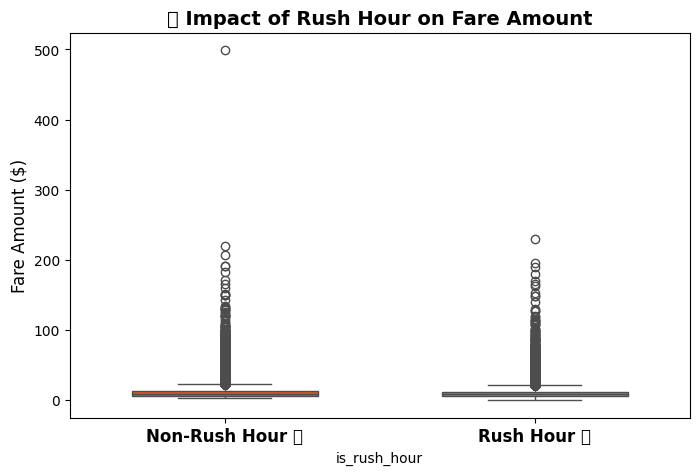

In [50]:
##rush hours vs non rush hours
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_rush_hour", y="fare_amount", data=df, palette=["#FF4500", "#32CD32"], width=0.6)
plt.xticks([0, 1], ["Non-Rush Hour 🚗", "Rush Hour 🚦"], fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("🚕 Impact of Rush Hour on Fare Amount", fontsize=14, fontweight="bold")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features=['passenger_count', 'distance_km', 'hour', 'day', 'month', 'day_of_week', 'is_rush_hour', 'is_night', 'is_weekend']
target='fare_amount'
X=df[features]
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [64]:
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f} USD")

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f} USD")

Linear Regression R²: 0.7017
Linear Regression RMSE: 5.29 USD
Random Forest R²: 0.7655
Random Forest RMSE: 4.69 USD
